In [347]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

In [348]:
dataset = pd.read_excel('../data/boxScores.xlsx')

In [349]:
dataset = dataset[dataset['MIN'] != 0]
print(dataset['W/L'].dtype)
dataset = dataset.dropna(subset=['W/L'])
dataset.head()

object


,PLAYER,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,...,PF,+/-,FP,Last3_FP_Avg,Last3_Min,Last5_FP_Avg,Last5_Min,Last7_FP_Avg,Last7_Min,Season_FP_Avg
0,A.J. Lawson,TOR,TOR @ NYK,2024-12-23,L,4,3,1,1,100,...,0,5,3.0,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,5.700000
1,A.J. Lawson,TOR,TOR @ MEM,2024-12-26,L,5,6,2,3,66.7,...,0,-4,8.4,5.700000,4.500000,5.700000,4.500000,5.700000,4.500000,5.700000
2,AJ Green,MIL,MIL @ PHI,2024-10-23,W,4,0,0,0,-,...,0,4,4.5,4.500000,4.000000,4.500000,4.000000,4.500000,4.000000,13.748276
3,AJ Green,MIL,MIL vs. CHI,2024-10-25,L,11,9,3,4,75.0,...,1,-6,11.7,8.100000,7.500000,8.100000,7.500000,8.100000,7.500000,13.748276
4,AJ Green,MIL,MIL @ BKN,2024-10-27,L,13,5,1,4,25.0,...,0,-3,5.5,7.233333,9.333333,7.233333,9.333333,7.233333,9.333333,13.748276


In [350]:
clusterdf = pd.read_excel('../data/clusteredPlayers.xlsx')

In [351]:
clusterdf = clusterdf.drop('Unnamed: 0', axis=1)
clusterdf.head()

,Player,Cluster
0,Anthony Black,1
1,Bennedict Mathurin,12
2,Clint Capela,8
3,De'Aaron Fox,10
4,Jake LaRavia,2


In [352]:
clusterDict = {}

In [353]:
clusterDict.update(pd.Series(clusterdf['Cluster'].values, index=clusterdf['Player']).to_dict())

In [354]:
dataset['CLUSTER'] = dataset['PLAYER'].map(clusterDict).astype('category')

In [355]:
dataset['CLUSTER'] = dataset['CLUSTER'].replace(clusterDict)
dataset.sort_values(by=['GAME DATE'], ascending = [False], inplace=True)
print(dataset['W/L'].unique())

[nan 'W' 'L']


In [356]:
# Remove players without a cluster
dataset = dataset.dropna(subset=['CLUSTER'])
dataset.describe()


,GAME DATE,MIN,PTS,FGM,FGA,3PM,3PA,FTM,FTA,OREB,...,PF,+/-,FP,Last3_FP_Avg,Last3_Min,Last5_FP_Avg,Last5_Min,Last7_FP_Avg,Last7_Min,Season_FP_Avg
count,7604,7604.000000,7604.000000,7604.000000,7604.000000,7604.000000,7604.000000,7604.000000,7604.000000,7604.000000,...,7604.000000,7604.000000,7604.000000,7604.000000,7604.000000,7604.000000,7604.000000,7604.000000,7604.000000,7604.000000
mean,2024-11-22 17:18:54.350341888,26.418464,12.692925,4.617175,9.897159,1.522357,4.188190,1.936218,2.463440,1.158864,...,2.042083,0.194240,25.721896,25.604704,26.307777,25.527295,26.226707,25.465612,26.168172,25.715877
min,2024-10-22 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-43.000000,-2.800000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,8.242105
25%,2024-11-06 00:00:00,20.000000,6.000000,2.000000,6.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,-8.000000,15.200000,16.900000,21.000000,17.075000,20.800000,17.162500,20.800000,17.841935
50%,2024-11-22 00:00:00,27.000000,11.000000,4.000000,9.000000,1.000000,4.000000,1.000000,2.000000,1.000000,...,2.000000,0.000000,24.400000,24.133333,26.666667,24.130000,26.600000,24.030952,26.571429,23.884000
75%,2024-12-08 00:00:00,33.000000,18.000000,7.000000,13.000000,2.000000,6.000000,3.000000,4.000000,2.000000,...,3.000000,8.000000,34.400000,32.954167,32.333333,32.528750,32.250000,32.368750,32.142857,32.138462
max,2024-12-29 00:00:00,48.000000,60.000000,22.000000,39.000000,10.000000,20.000000,17.000000,26.000000,12.000000,...,6.000000,43.000000,98.300000,80.500000,44.666667,75.360000,44.000000,72.200000,44.000000,63.355556
std,NaN,8.573873,8.732104,3.207715,5.795175,1.615524,3.219158,2.395743,2.876082,1.416820,...,1.432351,12.285246,14.159493,11.912857,7.547125,11.397982,7.303985,11.184901,7.199354,10.315308


In [357]:
cluster0 = dataset[dataset['CLUSTER'] == 0]
cluster1 = dataset[dataset['CLUSTER'] == 1]
cluster2 = dataset[dataset['CLUSTER'] == 2] 
cluster3 = dataset[dataset['CLUSTER'] == 3]
cluster4 = dataset[dataset['CLUSTER'] == 4]
cluster5 = dataset[dataset['CLUSTER'] == 5]
cluster6 = dataset[dataset['CLUSTER'] == 6]
cluster7 = dataset[dataset['CLUSTER'] == 7]
cluster8 = dataset[dataset['CLUSTER'] == 8]
cluster9 = dataset[dataset['CLUSTER'] == 9]
cluster10 = dataset[dataset['CLUSTER'] == 10]
cluster11 = dataset[dataset['CLUSTER'] == 11]
cluster12 = dataset[dataset['CLUSTER'] == 12]
cluster13 = dataset[dataset['CLUSTER'] == 13]
cluster14 = dataset[dataset['CLUSTER'] == 14]

In [358]:

dataset.head(15)

,PLAYER,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,...,+/-,FP,Last3_FP_Avg,Last3_Min,Last5_FP_Avg,Last5_Min,Last7_FP_Avg,Last7_Min,Season_FP_Avg,CLUSTER
5171,Jonathan Isaac,ORL,ORL vs. BKN,2024-12-29,NaN,17,5,2,7,28.6,...,-14,21.0,14.300000,15.666667,14.58,15.6,14.300000,15.714286,17.764286,2.0
1349,Cam Thomas,BKN,BKN @ ORL,2024-12-29,NaN,20,25,6,14,42.9,...,20,39.2,36.900000,26.333333,32.66,28.4,34.471429,29.857143,33.427778,3.0
7411,Nic Claxton,BKN,BKN @ ORL,2024-12-29,NaN,27,6,2,4,50.0,...,-5,14.3,26.400000,30.333333,26.04,29.0,23.571429,25.571429,26.150000,4.0
6011,Keon Johnson,BKN,BKN @ ORL,2024-12-29,NaN,21,14,5,10,50.0,...,11,20.0,28.200000,29.333333,27.14,29.0,21.385714,25.285714,14.673333,6.0
4252,Jalen Suggs,ORL,ORL vs. BKN,2024-12-29,NaN,13,8,2,7,28.6,...,-4,12.4,27.166667,23.666667,28.44,23.4,33.500000,26.714286,31.456250,13.0
9491,Tristan da Silva,ORL,ORL vs. BKN,2024-12-29,NaN,35,13,5,12,41.7,...,7,29.0,21.200000,34.000000,20.42,33.2,21.114286,33.571429,16.063333,2.0
3226,Gary Harris,ORL,ORL vs. BKN,2024-12-29,NaN,15,6,2,4,50.0,...,-14,11.0,5.500000,12.333333,9.52,16.2,8.285714,15.285714,8.242105,9.0
7603,Noah Clowney,BKN,BKN @ ORL,2024-12-29,NaN,31,13,4,7,57.1,...,4,12.2,18.500000,28.666667,19.94,28.8,18.557143,28.285714,15.917391,6.0
9635,Tyrese Martin,BKN,BKN @ ORL,2024-12-29,NaN,20,4,1,3,33.3,...,16,13.5,15.900000,18.666667,17.60,20.0,16.057143,19.000000,14.212500,6.0
5951,Kentavious Caldwell-Pope,ORL,ORL vs. BKN,2024-12-29,NaN,34,2,1,7,14.3,...,1,18.5,20.800000,32.333333,25.16,33.4,23.271429,33.285714,20.036364,2.0


In [359]:
dfFeatures = dataset[['Last3_FP_Avg', 'Last5_FP_Avg', 'Last7_FP_Avg', 'Season_FP_Avg', 'CLUSTER']]
dfLabels = dataset['FP']
dfFeatures = pd.get_dummies(dfFeatures, columns=['CLUSTER'], drop_first=True)

In [360]:
labels = np.array(dfLabels)
features = np.array(dfFeatures)

In [361]:
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.25, random_state=4)

In [362]:
reg = RandomForestRegressor(
    random_state=4,
)
reg.fit(train, train_labels)

RandomForestRegressor(random_state=4)

In [363]:
train_predictions = reg.predict(train)
predictions = reg.predict(test)

In [364]:
feature_columns = dfFeatures.columns
df = pd.DataFrame(test, columns = feature_columns)
df['Actual'] = test_labels
df['Predicted'] = predictions
df['Error'] = abs(df['Actual'] - df['Predicted'])

In [365]:
df.describe()

,Actual,Predicted,Error
count,1901.000000,1901.000000,1901.000000
mean,25.553709,25.256321,6.365590
std,14.252131,11.994125,5.054119
min,-2.800000,0.045000,0.009000
25%,14.900000,16.544000,2.461000
50%,24.200000,23.776000,5.219000
75%,34.200000,32.789000,9.215000
max,86.100000,81.052000,41.082000


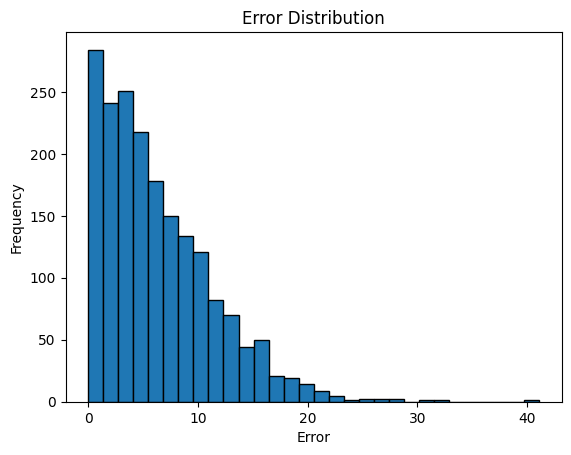

In [366]:
import matplotlib.pyplot as plt

plt.hist(df['Error'], bins=30, edgecolor='k')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()

In [367]:
dfgood = df0[(df0['Error']<5)]
dfgood.describe()

,Last3_FP_Avg,Last5_FP_Avg,Last7_FP_Avg,Season_FP_Avg,Actual,Predicted,Error
count,2.000000,2.00000,2.000000,2.00,2.000000,2.000000,2.000000
mean,15.083333,16.49000,18.992857,20.65,15.900000,16.217500,3.189500
std,10.913015,2.05061,3.464823,0.00,12.445079,7.934445,0.449013
min,7.366667,15.04000,16.542857,20.65,7.100000,10.607000,2.872000
25%,11.225000,15.76500,17.767857,20.65,11.500000,13.412250,3.030750
50%,15.083333,16.49000,18.992857,20.65,15.900000,16.217500,3.189500
75%,18.941667,17.21500,20.217857,20.65,20.300000,19.022750,3.348250
max,22.800000,17.94000,21.442857,20.65,24.700000,21.828000,3.507000


In [368]:
# Identfy unique list of cluster to loop over
clusterdf.head()

,Player,Cluster
0,Anthony Black,1
1,Bennedict Mathurin,12
2,Clint Capela,8
3,De'Aaron Fox,10
4,Jake LaRavia,2


In [369]:
clusterList = clusterdf['Cluster'].tolist()

In [370]:
uniqueClusterList = list(set(clusterList))
uniqueClusterList

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [371]:
ClusterError = 0
for cluster in uniqueClusterList:
    clusterdf = dataset[dataset['CLUSTER'] == cluster]
    dfFeatures = clusterdf[['Last3_FP_Avg', 'Last5_FP_Avg', 'Last7_FP_Avg', 'Season_FP_Avg']]
    dfLabels = clusterdf[['FP']]

    labels = np.array(dfLabels).ravel()
    features = np.array(dfFeatures)

    train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.25, random_state=4)

    reg = RandomForestRegressor(random_state=4)
    reg.fit(train, train_labels)

    train_predictions = reg.predict(train)
    predictions = reg.predict(test)

    df0 = pd.DataFrame(test, columns = ['Last3_FP_Avg', 'Last5_FP_Avg', 'Last7_FP_Avg', 'Season_FP_Avg'])
    df0['Actual'] = test_labels
    df0['Predicted'] = predictions
    df0['Error'] = abs(df0['Actual'] - df0['Predicted'])
    ClusterError += df0['Error'].mean()

    print(f"Cluster {cluster} average error is roughly {df0['Error'].mean()}")
avgClusterError = ClusterError/len(uniqueClusterList)
print(f"Average error across clusters is: {avgClusterError}")

Cluster 0 average error is roughly 5.405805555555558
Cluster 1 average error is roughly 6.682945945945943
Cluster 2 average error is roughly 5.225861313868613
Cluster 3 average error is roughly 7.3100540540540555
Cluster 4 average error is roughly 7.087571428571429
Cluster 5 average error is roughly 6.105247524752474
Cluster 6 average error is roughly 5.7636898395721925
Cluster 7 average error is roughly 8.140515436944007
Cluster 8 average error is roughly 6.649843750000003
Cluster 9 average error is roughly 5.864972656249999
Cluster 10 average error is roughly 7.99254605263158
Cluster 11 average error is roughly 7.231620000000001
Cluster 12 average error is roughly 6.264676300578033
Cluster 13 average error is roughly 7.274237623762374
Cluster 14 average error is roughly 6.722047244094486
Cluster 15 average error is roughly 8.032166666666667
Average error across clusters is: 6.734612587077964
